## NEXT radioactive budget

In [1]:
import os
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

import time
import glob
import tables as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

2017-10-12 01:30:46


In [2]:
from   invisible_cities.core.system_of_units_c import units

In [3]:
def gg_to_mubq(gg, mat='U238'):
    if mat == 'U238':
        return 1e+6*1e+9*gg/81
    elif mat == 'Th232':
        return 1e+6*1e+9*gg/246

#### Electroformed copper

In [113]:
gg_to_mubq(0.011e-12, mat='Th232')

0.044715447154471545

In [120]:
gg_to_mubq(0.33e-12, mat='Th232')

1.3414634146341464

#### Electroformed machined

In [114]:
gg_to_mubq(0.017e-12, mat='U238')

0.20987654320987653

In [115]:
gg_to_mubq(0.123e-12, mat='U238')

1.5185185185185186

#### Commercial copper

In [119]:
gg_to_mubq(0.21e-12, mat='U238')

2.5925925925925926

In [194]:
cases = ['all', 'limits', 'measured', 'estimated', 'improved', 'nausicaa']
Qbb = 2458

In [231]:
BI_NEXT100 = {'PV': (1.5, 0, 1.5/2, 1.5/2, 1.5/3),  # format is (activity, measured(1)-or-limit(0), estimated, next+, nausicaa)
      'PMTs': (5.25, 1, 5.25, 4.5/3, 0.5),
      'cans': (0.5, 0, 0.5/4, 0.5, 0.5),
      'windows' : (1.25, 0, 0, 0, 0),
      'KDbs' : (4.5, 1, 4.5/2, 4.5/2, 0.5),
      'SiPMs': (0.5, 0, 0, 0, 0),
      'FC' : (4.25, 0, 4.25/2, 4.25/2, 4.25/3),
      'srings' : (2.5, 0, 2.5/4, 2.5/4, 2.5/4),
      'erings' : (2.5, 0, 2.5/4, 2.5/4, 2.5/4),      
      'anode' : (1.25, 1, 1.25, 1.25, 0.25),
      'ICS' : (7, 0, 7/4, 7/4, 7/5),
      'OS' : (1.5, 1, 1.5, 1.5, 0)}

TL_NEXT100 = {'PV': (1.5, 0, 1.5/2, 1.5/2, 1.5/3),  # format is (activity, measured(1)-or-limit(0), estimated)
      'PMTs': (4.0, 1, 3.5, 4/3, 0.5),
      'cans': (0.25, 0, 0.25, 0.25, 0.25),
      'windows' : (0.25, 0, 0.25,  0.25, 0.25),
      'KDbs' : (0.75, 1, 0.75/2, 0.75/2, 0.5 ),
      'SiPMs': (0.5, 0, 0, 0, 0),
      'FC' : (0.25, 0, 0.25, 0.25, 0.25),
      'srings' : (0.25, 0, 0.25, 0.25, 0.25),
      'erings' : (0.5, 0, 0.5, 0.5, 0.5),      
      'anode' : (0.25, 1, 0.25, 0.25, 0.25),
      'ICS' : (2, 0, 2, 2, 2),
      'OS' : (0.25, 1, 0.25, 0.25, 0)}

In [97]:
explode = {'PV': 0,
      'PMTs': 0.1,
      'cans': 0.1,
      'windows' : 0.1,
      'KDbs' : 0,
      'SiPMs': 0,
      'FC' : 0,
      'rings' : 0,     
      'anode' : 0,
      'ICS' : 0,
      'OS' : 0}

In [161]:
def unpack_rdict(rdict):
    v = {values for values in rdict.values()}
    values, measured, estimated, improved, nausicaa = zip(*v)
    return np.array(values), np.array(measured), np.array(estimated), np.array(improved), np.array(nausicaa)

In [163]:
def rbudget(rdict, case='all'):
    v = {values for values in rdict.values()}
    v, m, e, i, n = unpack_rdict(rdict)
    if case =='all':
        return sum(v)
    elif case == 'limits':
        return sum(v[m==0])
    elif case == 'measured':
        return sum(v[m==1])
    elif case == 'estimated':
        return sum(e)
    elif case == 'improved':
        return sum(i)
    elif case == 'nausicaa':
        return sum(n)

    else:
        print('case not known, known cases are: all, limits, measured')
        

In [189]:
def total_activity(cases):
    sep = '\t\t'
    for i, case in enumerate(cases):
        if i > 1 : sep = '\t'
        lab = 'case = {} :'+sep+'budget = {}'
        print(lab.format(case, rbudget(BI_NEXT100, case) + rbudget(TL_NEXT100, case)))

In [184]:
def activity(rdict, cases):
    sep = '\t\t'
    for i, case in enumerate(cases):
        if i > 1 : sep = '\t'
        lab = 'case = {} :'+sep+'budget = {}'
        print(lab.format(case, rbudget(rdict, case)))

In [213]:
def background_roi(FWHM='.75e-2', M=100):
    print('mass = {} kg'.format(M))
    sep = '\t\t'
    for i, case in enumerate(cases):
        if i > 1 : sep = '\t'
        lab = 'case = {}:' + sep + 'b = {} counts'
        b = (rbudget(BI_NEXT100, case) + rbudget(TL_NEXT100, case) ) * 0.7e-2 * Qbb * 1e-5 * M
        print(lab.format(case,b))

In [220]:
activity(BI_NEXT100, cases)

case = all :		budget = 30.0
case = limits :		budget = 17.5
case = measured :	budget = 12.5
case = estimated :	budget = 17.875
case = improved :	budget = 11.25
case = nausicaa :	budget = 5.691666666666666


In [221]:
activity(TL_NEXT100, cases)

case = all :		budget = 10.0
case = limits :		budget = 4.75
case = measured :	budget = 5.25
case = estimated :	budget = 8.25
case = improved :	budget = 4.875
case = nausicaa :	budget = 4.5


In [232]:
total_activity(cases)

case = all :		budget = 40.0
case = limits :		budget = 22.25
case = measured :	budget = 17.75
case = estimated :	budget = 23.5
case = improved :	budget = 17.958333333333332
case = nausicaa :	budget = 10.191666666666666


In [233]:
background_roi(FWHM='.75e-2', M=100)

mass = 100 kg
case = all:		b = 0.6882400000000001 counts
case = limits:		b = 0.38283350000000005 counts
case = measured:	b = 0.3054065 counts
case = estimated:	b = 0.40434100000000006 counts
case = improved:	b = 0.30899108333333336 counts
case = nausicaa:	b = 0.17535781666666667 counts


In [200]:
background_roi(FWHM='.75e-2')

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [146]:
activity(BI_NEXT100, TL_NEXT100, case='all')

40.0

In [147]:
activity(BI_NEXT100, TL_NEXT100, case='measured')

17.5

In [148]:
activity(BI_NEXT100, TL_NEXT100, case='estimated')

26.375

In [133]:
rbudget(BI_NEXT100, case='measured')

11.5

In [137]:
rbudget(BI_NEXT100, case='limits')

17.5

In [138]:
rbudget(BI_NEXT100, case='estimated')

18.125

In [95]:
def rpie(rdict, exp):
    l,v =zip(*sorted((BI_NEXT100_ESTIMATED.items())))
    print(l)
    print(v)
    print(len(v))
    l,e =zip(*sorted((exp.items())))
    print(l)
    print(e)
    print(len(e))

    fig1, ax1 = plt.subplots()
    ax1.pie(v, labels=l, explode=e, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()
    

In [109]:
rbudget(BI_NEXT100)

TypeError: only integer scalar arrays can be converted to a scalar index

In [28]:
rbudget(BI_NEXT100_ESTIMATED)

17.125

In [29]:
rbudget(BI_NEXT100_PLUS)

11.875

In [31]:
rbudget(TL_NEXT100)

6.5

In [32]:
rbudget(TL_NEXT100_PLUS)

5.75

In [141]:
(rbudget(BI_NEXT100) + / rbudget(BI_NAUSICAA)

4.2

In [35]:
(rbudget(BI_NEXT100_PLUS) + rbudget(TL_NEXT100_PLUS)) / (rbudget(BI_NEXT100) + rbudget(TL_NEXT100))

0.6294642857142857

In [78]:
l,v =zip(*sorted((BI_NEXT100_ESTIMATED.items())))

In [79]:
l

('FC',
 'ICS',
 'KDbs',
 'OS',
 'PMTs',
 'PV',
 'SiPMs',
 'anode',
 'cans',
 'rings',
 'windows')

In [143]:
(rbudget(BI_NEXT100) + rbudget(TL_NEXT100)) / (rbudget(BI_NAUSICAA) + rbudget(TL_NAUSICAA))

2.975

In [136]:
BI_NEXT100_ESTIMATED = {'PV': 1.5/2,
      'PMTs': 4.25,
      'cans': 0.5,
      'windows' : 1,
      'KDbs' : 4.5,
      'SiPMs': 0.,
      'FC' : 4.5/2,
      'rings' : 2.5/4,
      'anode' : 1.5,
      'ICS' : 7/4,
      'OS' : 1.5}

0.19642857142857142

('FC', 'ICS', 'KDbs', 'OS', 'PMTs', 'PV', 'SiPMs', 'anode', 'cans', 'rings', 'windows')
(2.25, 1.75, 4.5, 1.5, 4.25, 0.75, 0.1, 1.5, 0.5, 0.625, 1)
11
('FC', 'ICS', 'KDbs', 'OS', 'PMTs', 'PV', 'SiPMs', 'anode', 'cans', 'rings', 'windows')
(0, 0, 0, 0, 0.1, 0, 0, 0, 0.1, 0, 0.1)
11


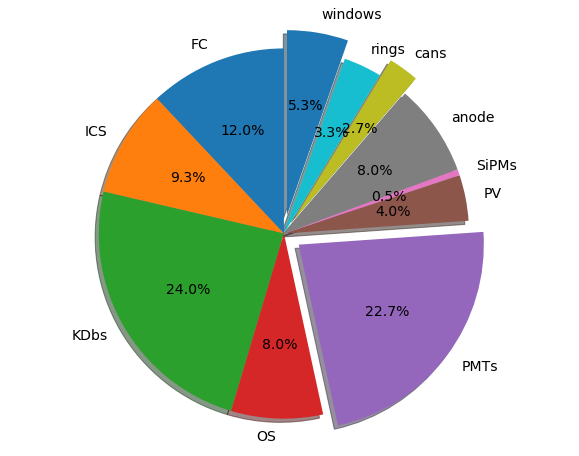

In [98]:
rpie(BI_NEXT100_ESTIMATED, explode)

In [70]:
v

(0.75, 4.25, 0.5, 1, 4.5, 0.0, 2.25, 0.625, 1.5, 1.75, 1.5)

In [50]:
x, y = zip(*zip(list(BI_NEXT100_ESTIMATED.items())))

ValueError: not enough values to unpack (expected 2, got 1)

In [36]:
labels, sizes = list(BI_NEXT100_ESTIMATED.keys())
sizes =

In [38]:
labels

['PV',
 'PMTs',
 'cans',
 'windows',
 'KDbs',
 'SiPMs',
 'FC',
 'rings',
 'anode',
 'ICS',
 'OS']

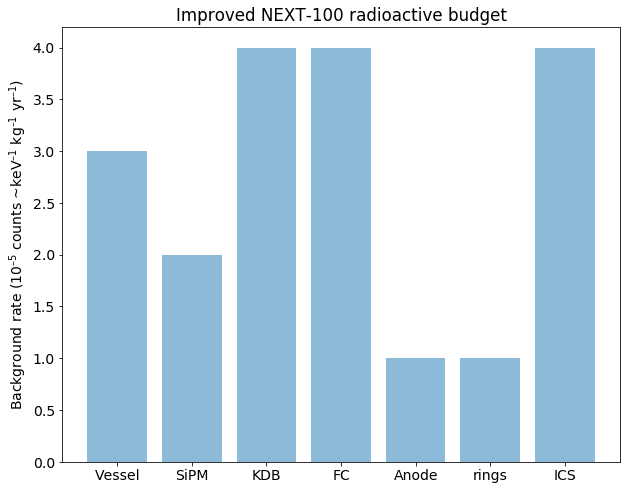

In [154]:

 
#objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
objects = 'Vessel', 'SiPM', 'KDB', 'FC', 'Anode', 'rings', 'ICS'
y_pos = np.arange(len(objects))
#performance = [10,8,6,4,2,1]
performance = 2*np.array([1.5, 1, 2, 2, 0.5, 0.5, 2])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Background rate ($10^{–5}$ counts ~keV$^{–1}$ kg$^{–1}$ yr$^{–1}$)')
plt.title('Improved NEXT-100 radioactive budget')
 
plt.show()

In [155]:
np.sum(5)

5